In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

###### x_MLP/W9_L4(lastlec.)-dip-iitm: [Decision Trees for classification - Iris](https://www.youtube.com/watch?v=3Lc7sD1Dj4Q&list=PLyGVjd4KQp13HB4vo0f_ztrpR8dPrDNKP&index=70)

# Decision Trees for Classification

In this notebook, we will demonstrate `decision tree` in `classification` set up with `Iris dataset`

## Imports

In [2]:
import matplotlib.pyplot as plt

from sklearn import tree

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split,\
GridSearchCV

from sklearn.metrics import classification_report,\
confusion_matrix, ConfusionMatrixDisplay

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier, export_text


## Data Loading

In [3]:
# let's load iris dataset with load_iris API.
features, labels = load_iris(return_X_y=True, as_frame=True)

Let's split the data into train and test

In [4]:
train_features, test_features, train_labels, test_labels =\
train_test_split(features, labels, test_size=0.2, random_state=42)

Define the decision tree classifier as part of `pipeline`

In [5]:
dt_pipeline = Pipeline(steps=[("feature_scaling", MinMaxScaler()),
                              ("dt_classifier",
                              DecisionTreeClassifier(max_depth=3,\
                                                    random_state=42))])

Train the classifier

In [6]:
dt_pipeline.fit(train_features, train_labels)

Pipeline(steps=[('feature_scaling', MinMaxScaler()),
                ('dt_classifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

Now that the clasifier is trained, let's evaluate it on the test set with
- Confusion matrix
- Classification report

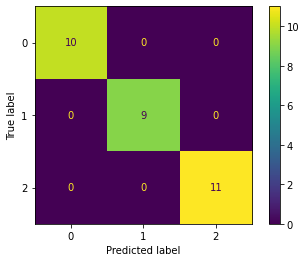

In [7]:
ConfusionMatrixDisplay.from_estimator(dt_pipeline, test_features, test_labels);

In [8]:
print(classification_report(test_labels, dt_pipeline.predict(test_features)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



As a next step, let's visualize the trained decision tree model.

In [9]:
data = load_iris()

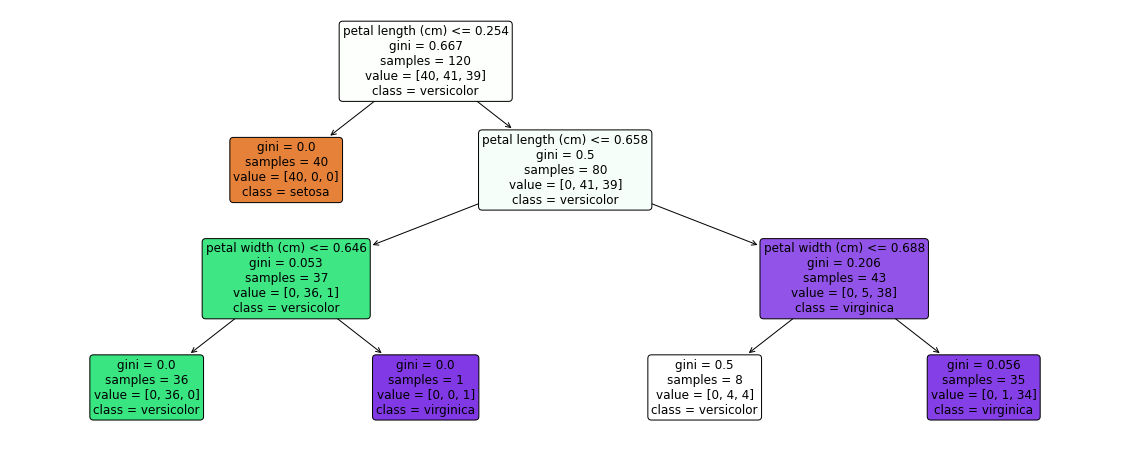

In [10]:
# plt the figure, setting a black background
plt.figure(figsize=(20,8), facecolor='w')
# create the tree plot
a = tree.plot_tree(dt_pipeline[-1],
                  # use the feature names stored
                   feature_names = features.columns,
                   # use the class names stored
                   class_names = data.target_names,
                   rounded=True,
                   filled=True,
                   fontsize=12
                  );

Let's convert this tree representation into if-else rule set.

In [11]:
# export the decision rules
tree_rules = export_text(dt_pipeline[-1],
                        feature_names=list(features.columns))
# print the result
print(tree_rules)

|--- petal length (cm) <= 0.25
|   |--- class: 0
|--- petal length (cm) >  0.25
|   |--- petal length (cm) <= 0.66
|   |   |--- petal width (cm) <= 0.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  0.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  0.66
|   |   |--- petal width (cm) <= 0.69
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  0.69
|   |   |   |--- class: 2



Let's get the feature importance from the trained decision tree model.

In [12]:
# extract importance
importance = pd.DataFrame({'feature': features.columns,
                           'importance': np.round(
                              dt_pipeline[-1].feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace=True)
print(importance)

             feature  importance
2  petal length (cm)       0.935
3   petal width (cm)       0.065
0  sepal length (cm)       0.000
1   sepal width (cm)       0.000


There are two configurable parameters in tree classifier:
- `max-depth`
- `min_samples_split`

In [13]:
hp_grid = [{'dt_classifier__max_depth': [1,2,3,4,5],
            'dt_classifier__min_samples_split': [2,4,6,8,10]}]
gs_clf = GridSearchCV(dt_pipeline, hp_grid, scoring='f1_macro')
gs_clf.fit(train_features, train_labels)

print("Best parameters:")
print()
print(gs_clf.best_params_)
print()
print("Grid scores:")
means = gs_clf.cv_results_["mean_test_score"]
stds = gs_clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds,
                            gs_clf.cv_results_['params']):
    print(f"{mean:0.3} (+/-{std*2:0.03f}) for {params}")

Best parameters:

{'dt_classifier__max_depth': 4, 'dt_classifier__min_samples_split': 2}

Grid scores:
0.559 (+/-0.014) for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 2}
0.559 (+/-0.014) for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 4}
0.559 (+/-0.014) for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 6}
0.559 (+/-0.014) for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 8}
0.559 (+/-0.014) for {'dt_classifier__max_depth': 1, 'dt_classifier__min_samples_split': 10}
0.916 (+/-0.091) for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 2}
0.916 (+/-0.091) for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 4}
0.916 (+/-0.091) for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 6}
0.916 (+/-0.091) for {'dt_classifier__max_depth': 2, 'dt_classifier__min_samples_split': 8}
0.916 (+/-0.091) for {'dt_classifier__max_depth': 2, 'dt_classifier_

Confusion matrix for the best estimator obtained through the `GridSearchCv`.

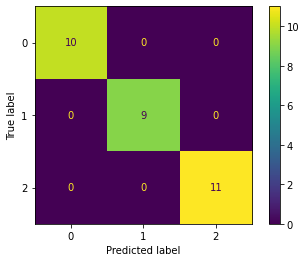

In [14]:
ConfusionMatrixDisplay.from_estimator(gs_clf.best_estimator_, test_features, test_labels);